In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
try:
    import pandas_datareader as web

except:
    !pip install pandas_datareader
    import pandas_datareader as web


zsh:1: command not found: brew


In [16]:
def MDD(ticker, startdate, enddate):
    balance = web.get_data_yahoo(ticker, startdate, enddate)['Adj Close']
    max_drawdown = [balance[0]]

    for i in range(1, len(balance)):
        max_drawdown.append(balance[0:i+1].max())

    drawdown, mdd = [], []

    for i in range(len(balance)):
        drawdown.append((balance[i] -max_drawdown[i])/max_drawdown[i])
        mdd.append(min(drawdown))

    df = pd.DataFrame([drawdown, mdd]).transpose()
    df.index = balance.index
    df.columns = ['drawdown', 'mdd']

    return drawdown, mdd, df

<AxesSubplot:xlabel='Date'>

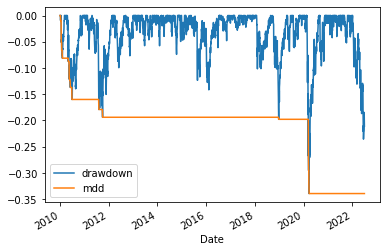

In [19]:
drawdown, mdd, df = MDD('^GSPC', '2010-01-02', '2022-06-30')


df.plot()

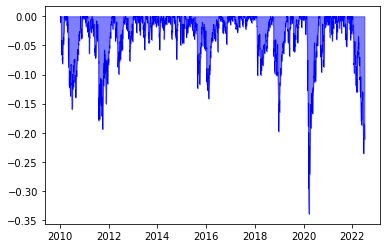

In [10]:
plt.plot(df.drawdown, linewidth = 0.5, color = 'b')
plt.fill_between(df.index, df.drawdown.max(), df.drawdown, alpha = 0.5, color = 'b')

In [13]:
MDD = "%0.4f%%" % (min(mdd) *100)

MDD



'-33.9250%'